# Importing Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Optional interactive plots
import plotly.express as px

In [9]:
df = pd.read_csv("C:\\Users\\akhil\\Downloads\\archive\\Titanic-Dataset.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,NaN,S
1,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,0.432793,-0.473674,113803,0.420730,C123,S
3,5,0,3,"Allen, Mr. William Henry",male,0.365167,-0.474545,-0.473674,373450,-0.486337,NaN,S
4,7,0,1,"McCarthy, Mr. Timothy J",male,1.674039,-0.474545,-0.473674,17463,0.395814,E46,S


In [13]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  453 non-null    int64  
 1   Survived     453 non-null    int64  
 2   Pclass       453 non-null    int64  
 3   Name         453 non-null    object 
 4   Sex          453 non-null    object 
 5   Age          453 non-null    float64
 6   SibSp        453 non-null    float64
 7   Parch        453 non-null    float64
 8   Ticket       453 non-null    object 
 9   Fare         453 non-null    float64
 10  Cabin        77 non-null     object 
 11  Embarked     453 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 42.6+ KB


In [15]:
# Summary statistics
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,453.000000,453.000000,453.000000,453,453,453.000000,453.000000,4.530000e+02,453,453.000000,77,453
unique,NaN,NaN,NaN,453,2,NaN,NaN,NaN,417,NaN,62,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,1601,NaN,D,S
freq,NaN,NaN,NaN,1,338,NaN,NaN,NaN,4,NaN,3,378
mean,451.955850,0.309051,2.401766,NaN,NaN,0.094101,-0.286267,-4.736736e-01,NaN,-0.324540,NaN,NaN
std,262.229866,0.462613,0.765516,NaN,NaN,0.788158,0.405986,1.389313e-15,NaN,0.272772,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,-1.701472,-0.474545,-4.736736e-01,NaN,-0.648422,NaN,NaN
25%,217.000000,0.000000,2.000000,NaN,NaN,-0.530377,-0.474545,-4.736736e-01,NaN,-0.489609,NaN,NaN
50%,453.000000,0.000000,3.000000,NaN,NaN,-0.048161,-0.474545,-4.736736e-01,NaN,-0.443636,NaN,NaN
75%,689.000000,1.000000,3.000000,NaN,NaN,0.502943,-0.474545,-4.736736e-01,NaN,-0.270141,NaN,NaN


# Visualizations (Histograms & Boxplots)


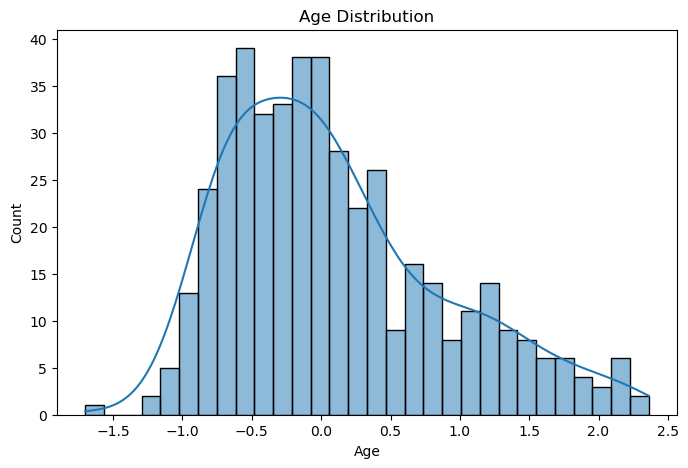

In [18]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


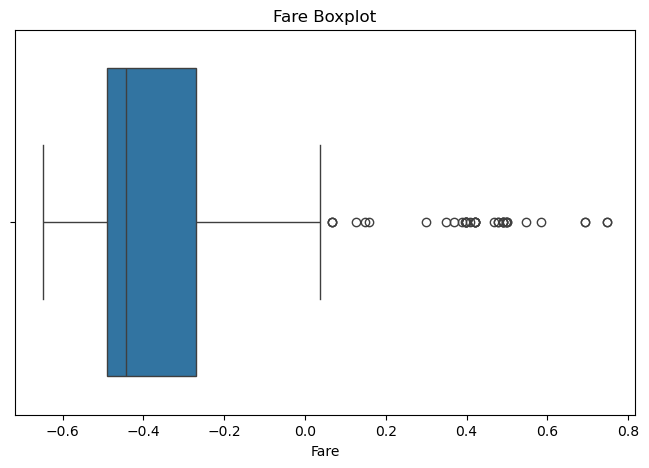

In [20]:
# Boxplot for Fare
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.show()

# Pairplot & Correlation Matrix

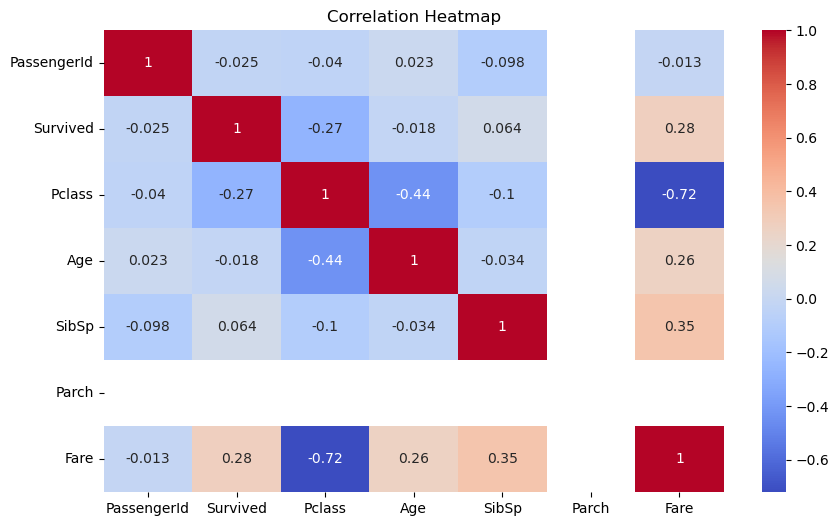

In [31]:
# Correlation Matrix with numeric columns only
corr_matrix = df.corr(numeric_only=True)

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Pairplot for selected features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')

# Detecting Skewness, Trends & Anomalies

In [26]:
# Skewness
print(df.skew(numeric_only=True))

PassengerId   -0.010943
Survived       0.829185
Pclass        -0.825444
Age            0.787218
SibSp          2.024625
Parch          0.000000
Fare           1.965907
dtype: float64


In [28]:
# Checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          376
Embarked         0
dtype: int64

In [ ]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Categorical Analysis

In [ ]:
# Countplot of survival
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")

In [ ]:
# Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Pclass vs Survival")

In [ ]:
# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Sex vs Survival")